<a href="https://colab.research.google.com/github/ngonhan2k5/cs-ml/blob/master/proj1/AUC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [166]:
#load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                      'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
# df.sample(4)

test_size= 0.2

# 2. Algorithm Models

## kNN

In [167]:
def kNN(df, test_size):
  # Change all the objects to categorial type
  for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
      df[col] = df[col].astype('category')

  # drop all the rows having NaN
  df = df.dropna()

  # reset the index in the panda:
  df = df.reset_index(drop=True)

  #LabelEncoder
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()

  # Converting string labels into numbers.
  df[['workclass']]=le.fit_transform(df[['workclass']])
  df[['marital_status']]=le.fit_transform(df[['marital_status']])
  df[['occupation']]=le.fit_transform(df[['occupation']])
  df[['race']] =le.fit_transform(df[['race']])
  df[['sex']]=le.fit_transform(df[['sex']])
  df[['native_country']]=le.fit_transform(df[['native_country']])
  df[['income']]=le.fit_transform(df[['income']])

  #Selecting Features
  features=df[['age','workclass','education_num','marital_status','occupation','race','sex','capital_gain','hours_per_week','native_country']]
  
  label = df[['income']]

  from sklearn.model_selection import train_test_split
  features_, features_actual, label_, label_actual = train_test_split(features, label, test_size=test_size)
  features_actual.count()

  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors=18)
  classifier.fit(features_,label_)
  score= classifier.score(features_actual, label_actual)
  print("kNN Score:", score)
  return features_actual, label_actual, classifier

## Decision Tree

In [172]:
def decision_tree(df, test_size):  
  #remove records missing values
  no_missing_df= df.drop(df[df.native_country.isnull()].index)
  no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.workclass.isnull()].index)
  no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.occupation.isnull()].index)
  no_missing_df.isnull().sum().max() #just checking that there's no missing data missing...

  #LabelEncoder
  from sklearn.preprocessing import LabelEncoder
  le= LabelEncoder()
  no_missing_df['workclass_num']= le.fit_transform(no_missing_df['workclass'])
  no_missing_df['marital_status_num']= le.fit_transform(no_missing_df['marital_status'])
  no_missing_df['occupation_num']= le.fit_transform(no_missing_df['occupation'])
  no_missing_df['relationship_num']= le.fit_transform(no_missing_df['relationship'])
  no_missing_df['race_num']= le.fit_transform(no_missing_df['race'])
  no_missing_df['sex_num']= le.fit_transform(no_missing_df['sex'])
  no_missing_df['native_country_num']= le.fit_transform(no_missing_df['native_country'])
  no_missing_df['income_num']= le.fit_transform(no_missing_df['income'])

  #remove the unnecessary features
  neccessary_columns_df= no_missing_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])

  #separate input and target
  X= neccessary_columns_df.drop('income_num', axis='columns')
  y= neccessary_columns_df['income_num']

  #Shuffle and Split data into Training, Testing dataframe
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=test_size, random_state=1)
 
  from sklearn.tree import DecisionTreeClassifier
  best_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=9, min_samples_leaf=3, min_samples_split=8)
  best_clf= best_clf.fit(X_train, y_train)
  score= best_clf.score(X_test, y_test)
  print("Decision Tree Score:", score)
  return X_test, y_test, best_clf


## SVM

In [175]:
def svm(df, test_size):
  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

  %matplotlib inline
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  from matplotlib import style

  import seaborn as sns 

  from sklearn import linear_model
  from sklearn.linear_model import LogisticRegression
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.linear_model import Perceptron
  from sklearn.linear_model import SGDClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC, LinearSVC
  from sklearn.naive_bayes import GaussianNB

  cleaned_df = df.copy('true').dropna(axis=0)
  cleaned_df.sample(10)

  cleaned_df['over_50K'] = np.where(cleaned_df.income == '<=50K', 0, 1)
  cleaned_df['sex_num'] = np.where(cleaned_df.sex == 'Female', 0, 1)

  cleaned_df['workclass_num'] = cleaned_df.workclass.map({'Self-emp-not-inc' : 0, 'Private':1, 'State-gov':2, 
                                                            'Without-pay':3, 'Local-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 'Never-worked':7}).astype(int)


  cleaned_df['marital_status_num'] = cleaned_df['marital_status'].map({'Never-married' : 0, 'Widowed' : 1, 'Separated' : 2, 
                                                                        'Married-spouse-absent' : 3, 'Married-civ-spouse' : 4, 'Divorced' : 5, 'Married-AF-spouse' : 6}).astype(int)

  cleaned_df['occupation_num'] = cleaned_df['occupation'].map({'Farming-fishing' : 0, 'Other-service' : 1, 'Transport-moving' : 2, 'Protective-serv' : 3, 'Exec-managerial' : 4, 'Armed-Forces' : 5, 
  'Machine-op-inspct' : 6, 'Prof-specialty' : 7, 'Tech-support' : 8, 'Handlers-cleaners' : 9, 'Priv-house-serv' : 10, 'Adm-clerical' : 11, 'Craft-repair' : 12, 'Sales' : 13}).astype(int)

  cleaned_df['relationship_num'] = cleaned_df['relationship'].map({'Wife' : 0, 'Unmarried' : 1, 'Own-child' : 2, 'Husband' : 3, 'Other-relative' : 4, 'Not-in-family' : 5}).astype(int)
  cleaned_df['race_num'] = cleaned_df['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})

  cleaned_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])

  #Split data and pick features
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler

  # Pick discussed features
  X = cleaned_df[['education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'sex_num', 'workclass_num', 'marital_status_num', 'occupation_num', 'relationship_num', 'race_num']]

  scaler = StandardScaler()
  scaler.fit(X)
  X = scaler.transform(X)

  # Pick the labels (Income)
  Y = cleaned_df['over_50K']

  # Spliting into 80% for training set and 20% for testing set
  X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

  #Best parameters set found on development set: 
  #{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
  svc_clf = SVC(kernel='rbf', C = 1, gamma = 0.0001)
  svc_clf.fit(X_train, Y_train)
  score= svc_clf.score(x_test, y_test)
  print("SVM Score:", score)
  return x_test, y_test, svc_clf

## Logit

In [177]:
def logit(df, test_size):
  # import pandas as pd 
  # df = pd.read_csv("./adult.csv", skipinitialspace=True, na_values="?")

  for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
      df[col] = df[col].astype('category')      
  #print(df.dtypes)

  category_columns = list(df.select_dtypes(include=['category']).columns)
  #print(category_columns)

  numberic_columns = list(df.select_dtypes(include=['int64']).columns)
  #because education_num had relationship with educatoin
  numberic_columns.remove('education_num')
  #print(numberic_columns)

  # remove rows with missing values
  for col in category_columns:
      df = df[df[col].str.contains("\\?") == False]
  nrow2 = df.shape[0]

  df.income = df.income.apply(lambda x:0 if x=='<=50K' else 1)
  df.income.head()

  # one hot encoding sex 
  one_hot_coding =  pd.get_dummies(df[['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex']])
  one_hot_coding.head()

  
  columns = list(one_hot_coding.columns) 
  columns

  combined = pd.concat([df['income'], df[numberic_columns], one_hot_coding], axis=1)
  combined.head()

  # X = df[['age', 'workclass', 'fnlwgt', 'educatoin', 'educatoin_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week']]
  X = combined[columns]
  y = combined['income']

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      random_state=42,
                                                      stratify=y,
                                                      test_size=test_size)
  
  
  from sklearn.linear_model import LogisticRegression
  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
  return X_test, y_test, logreg

# Random Forest

# 3. AUC Curve

**3.1. Run the models**

In [181]:
X_test_knn, y_test_knn, knn_clf = kNN(df, test_size)
X_test_dt, y_test_dt, dt_clf= decision_tree(df, test_size)
X_test_svm, y_test_svm, svm_clf= svm(df, test_size)
X_test_logit, y_test_logit, logit_clf= logit(df, test_size)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


kNN Score: 0.8377258412066965
Decision Tree Score: 0.8488314271506713
SVM Score: 0.7637991049229239
Accuracy of logistic regression classifier on test set: 0.83


**3.2. Draw AUC**

<Figure size 864x864 with 0 Axes>

================kNN 6033 6033


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, '\n Receiver operating characteristic \n\n kNN(n_neighbors=18) \n Decision Tree(criterion= gini, max_depth=9, min_samples_leaf=3, min_samples_split=8) \n SVM(kernel=rbf, C = 1, gamma = 0.0001) \n LogisticRegression(max_iter=1000)')

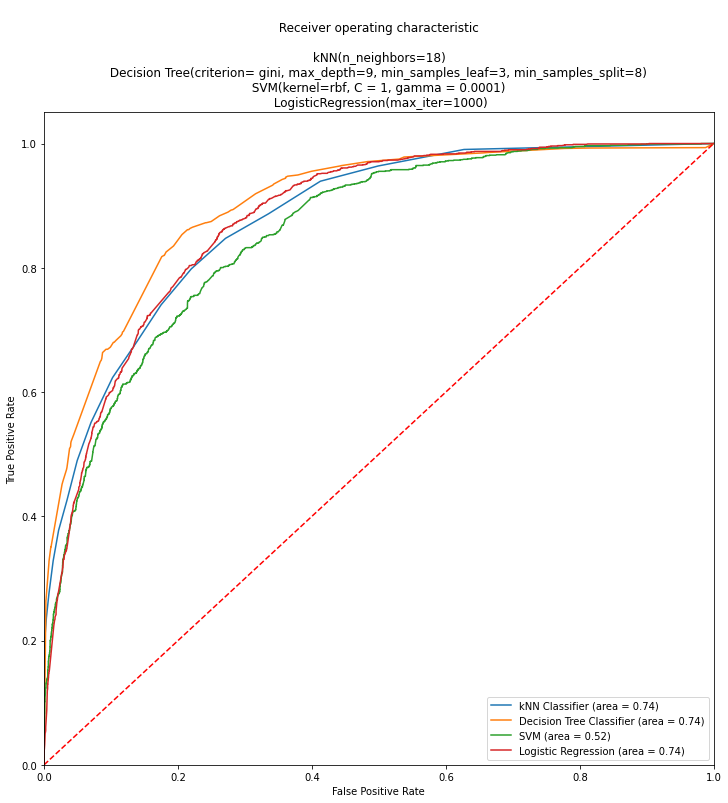

In [182]:
#ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize=(12, 12))

print ("================kNN",  len(X_test_knn), len(y_test_knn))
# print ("================DT",  len(X_test_dt), len(y_test_dt))
# print ("================SVM",  len(X_test_svm), len(y_test_logit))
# print ("================Logistic",  len(X_test_logit), len(y_test_logit))

#kNN
knn_roc_auc = roc_auc_score(y_test_knn, knn_clf.predict(X_test_knn))
fpr, tpr, thresholds = roc_curve(y_test_knn, knn_clf.predict_proba(X_test_knn)[:,1])
plt.plot(fpr, tpr, label='kNN Classifier (area = %0.2f)' % knn_roc_auc)

#Decision Tree
dt_roc_auc = roc_auc_score(y_test_dt, dt_clf.predict(X_test_dt))
fpr, tpr, thresholds = roc_curve(y_test_dt, dt_clf.predict_proba(X_test_dt)[:,1])
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc)

#SVM
svm_roc_auc = roc_auc_score(y_test_svm, svm_clf.predict(X_test_svm))
fpr, tpr, thresholds = roc_curve(y_test_svm, svm_clf.decision_function(X_test_svm))
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)

#Logit
logit_roc_auc = roc_auc_score(y_test_logit, logit_clf.predict(X_test_logit))
fpr, tpr, thresholds = roc_curve(y_test_logit, logit_clf.predict_proba(X_test_logit)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)




plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
title= '\n Receiver operating characteristic \n\n kNN(n_neighbors=18) \n Decision Tree(criterion= gini, max_depth=9, min_samples_leaf=3, min_samples_split=8) \n SVM(kernel=rbf, C = 1, gamma = 0.0001) \n LogisticRegression(max_iter=1000)'
plt.title(title)
plt.legend(loc="lower right")
plt.savefig('dt_ROC')
plt.show()